In [5]:
pip install pandas numpy matplotlib seaborn scikit-learn jupyterlab wordcloud nltk pickle-mixin  

     ---------------------------------------- 0.0/27.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/27.6 MB ? eta -:--:--
     - -------------------------------------- 0.8/27.6 MB 5.4 MB/s eta 0:00:05
     --- ------------------------------------ 2.1/27.6 MB 5.8 MB/s eta 0:00:05
     ---- ----------------------------------- 3.1/27.6 MB 5.3 MB/s eta 0:00:05
     ----- ---------------------------------- 3.7/27.6 MB 4.9 MB/s eta 0:00:05
     ------ --------------------------------- 4.5/27.6 MB 4.5 MB/s eta 0:00:06
     -------- ------------------------------- 6.0/27.6 MB 5.0 MB/s eta 0:00:05
     ---------- ----------------------------- 7.3/27.6 MB 5.3 MB/s eta 0:00:04
     ------------ --------------------------- 8.9/27.6 MB 5.5 MB/s eta 0:00:04
     -------------- ------------------------- 10.2/27.6 MB 5.7 MB/s eta 0:00:04
     ----------------- ---------------------- 11.8/27.6 MB 5.8 MB/s eta 0:00:03
     ------------------- -------------------- 13.4/27.6 MB 5.9 M

  error: subprocess-exited-with-error
  
  × Building wheel for wordcloud (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      C:\Users\naman\AppData\Local\Temp\pip-build-env-g5wuertr\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ***********************************************

In [5]:
%pip install conda -c conda-forge wordcloud

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


In [2]:
# ## 1️⃣ Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except ImportError:
    WORDCLOUD_AVAILABLE = False
    print("⚠️ WordCloud not available. Skipping word cloud visualizations.")
import warnings

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, roc_curve, auc, roc_auc_score)
import pickle
import re

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("✅ All libraries imported successfully!")

⚠️ WordCloud not available. Skipping word cloud visualizations.
✅ All libraries imported successfully!


📊 Dataset Shape: (5572, 2)

✅ Dataset loaded successfully!

First 5 rows:
📈 DATASET INFORMATION

Total Messages: 5572

Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Percentage Distribution:
label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


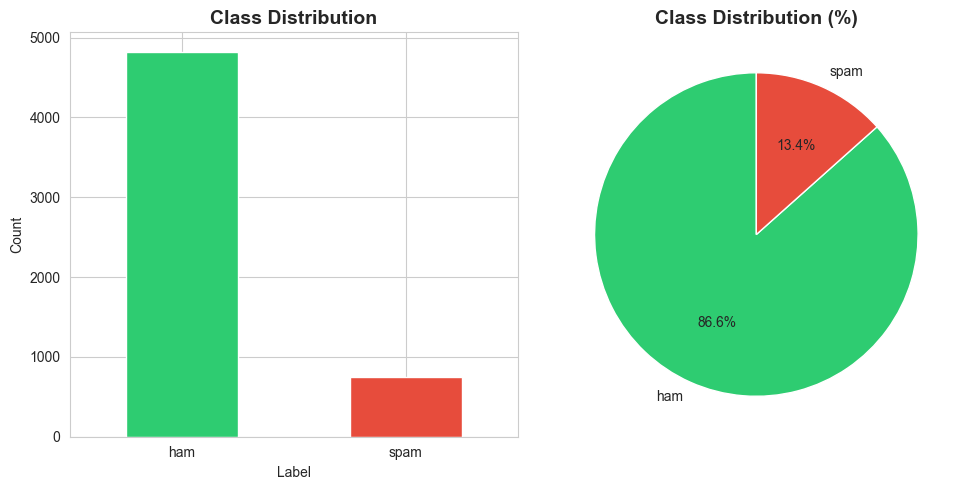

In [3]:
# ## 2️⃣ Load and Explore Dataset

df = pd.read_csv('spam.csv', encoding='latin-1')

# Keep only relevant columns
df = df.iloc[:, :2]
df.columns = ['label', 'message']

# Remove any missing values
df = df.dropna()

print(f"📊 Dataset Shape: {df.shape}")
print(f"\n✅ Dataset loaded successfully!")
print(f"\nFirst 5 rows:")
df.head()

# Dataset Information
print("="*60)
print("📈 DATASET INFORMATION")
print("="*60)
print(f"\nTotal Messages: {len(df)}")
print(f"\nLabel Distribution:")
print(df['label'].value_counts())
print(f"\nPercentage Distribution:")
print(df['label'].value_counts(normalize=True) * 100)

# Visualize Class Distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                 colors=['#2ecc71', '#e74c3c'],
                                 startangle=90)
plt.title('Class Distribution (%)', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

📝 TEXT STATISTICS

Average message length:
label
ham      71.234197
spam    139.340027
Name: message_length, dtype: float64

Average word count:
label
ham     14.200622
spam    23.851406
Name: word_count, dtype: float64


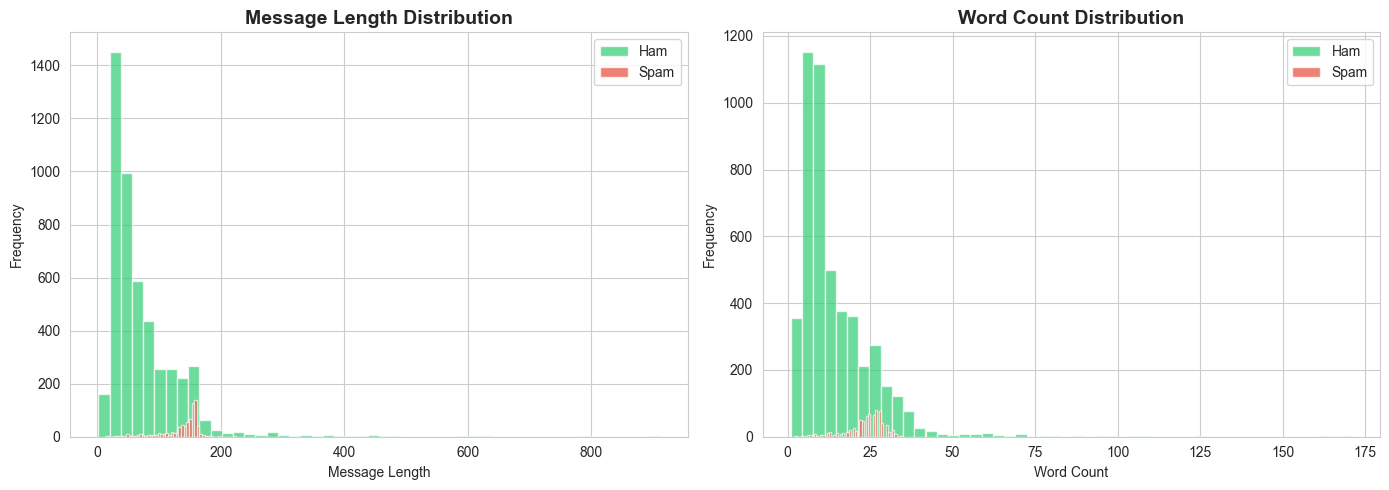

In [4]:
# ## 3️⃣ Text Data Analysis

# Add message length column
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

print("="*60)
print("📝 TEXT STATISTICS")
print("="*60)
print(f"\nAverage message length:")
print(df.groupby('label')['message_length'].mean())
print(f"\nAverage word count:")
print(df.groupby('label')['word_count'].mean())

# Visualize message length distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
df[df['label']=='ham']['message_length'].hist(bins=50, alpha=0.7, 
                                                label='Ham', color='#2ecc71')
df[df['label']=='spam']['message_length'].hist(bins=50, alpha=0.7, 
                                                 label='Spam', color='#e74c3c')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Message Length Distribution', fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
df[df['label']=='ham']['word_count'].hist(bins=50, alpha=0.7, 
                                           label='Ham', color='#2ecc71')
df[df['label']=='spam']['word_count'].hist(bins=50, alpha=0.7, 
                                            label='Spam', color='#e74c3c')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution', fontsize=14, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# ## 4️⃣ Word Clouds - Visualize Common Words

# Word Cloud for HAM messages
try:
    from wordcloud import WordCloud
    WORDCLOUD_AVAILABLE = True
except:
    WORDCLOUD_AVAILABLE = False

if WORDCLOUD_AVAILABLE:
    # Word Cloud for HAM messages
    ham_messages = ' '.join(df[df['label']=='ham']['message'])
    
    plt.figure(figsize=(15, 6))
    
    plt.subplot(1, 2, 1)
    wordcloud_ham = WordCloud(width=800, height=400, 
                              background_color='white',
                              colormap='Greens').generate(ham_messages)
    plt.imshow(wordcloud_ham, interpolation='bilinear')
    plt.title('Most Common Words in HAM Messages', fontsize=16, fontweight='bold')
    plt.axis('off')
    
    # Word Cloud for SPAM messages
    spam_messages = ' '.join(df[df['label']=='spam']['message'])
    
    plt.subplot(1, 2, 2)
    wordcloud_spam = WordCloud(width=800, height=400, 
                               background_color='white',
                               colormap='Reds').generate(spam_messages)
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.title('Most Common Words in SPAM Messages', fontsize=16, fontweight='bold')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ WordCloud not installed. Skipping word cloud visualization.")

⚠️ WordCloud not installed. Skipping word cloud visualization.


In [6]:
# ## 5️⃣ Data Preprocessing

def preprocess_text(text):
    """Clean and preprocess text"""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    return text

# Apply preprocessing
df['clean_message'] = df['message'].apply(preprocess_text)

print("✅ Text preprocessing completed!")
print("\nExample:")
print(f"Original: {df['message'].iloc[0]}")
print(f"Cleaned: {df['clean_message'].iloc[0]}")

✅ Text preprocessing completed!

Example:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned: go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat


In [7]:
# ## 6️⃣ Prepare Data for Training

# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split features and target
X = df['clean_message']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*60)
print("📊 DATA SPLIT")
print("="*60)
print(f"Training set: {len(X_train)} messages")
print(f"Test set: {len(X_test)} messages")
print(f"\nTrain set distribution:")
print(y_train.value_counts())
print(f"\nTest set distribution:")
print(y_test.value_counts())

📊 DATA SPLIT
Training set: 4457 messages
Test set: 1115 messages

Train set distribution:
label
0    3859
1     598
Name: count, dtype: int64

Test set distribution:
label
0    966
1    149
Name: count, dtype: int64


In [8]:
# ## 7️⃣ TF-IDF Vectorization

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=3000,
    min_df=2,
    max_df=0.8,
    stop_words='english',
    ngram_range=(1, 2)
)

# Transform training and test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("✅ TF-IDF Vectorization completed!")
print(f"\nTraining features shape: {X_train_tfidf.shape}")
print(f"Test features shape: {X_test_tfidf.shape}")
print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())}")

✅ TF-IDF Vectorization completed!

Training features shape: (4457, 3000)
Test features shape: (1115, 3000)
Vocabulary size: 3000


In [9]:
# ## 8️⃣ Train Naive Bayes Model

# Initialize and train model
model = MultinomialNB(alpha=0.1)
model.fit(X_train_tfidf, y_train)

print("✅ Model training completed!")

# Make predictions
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n" + "="*60)
print("🎯 MODEL PERFORMANCE")
print("="*60)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

✅ Model training completed!

🎯 MODEL PERFORMANCE
Training Accuracy: 98.79%
Test Accuracy: 97.76%


📊 CLASSIFICATION REPORT
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       0.97      0.86      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



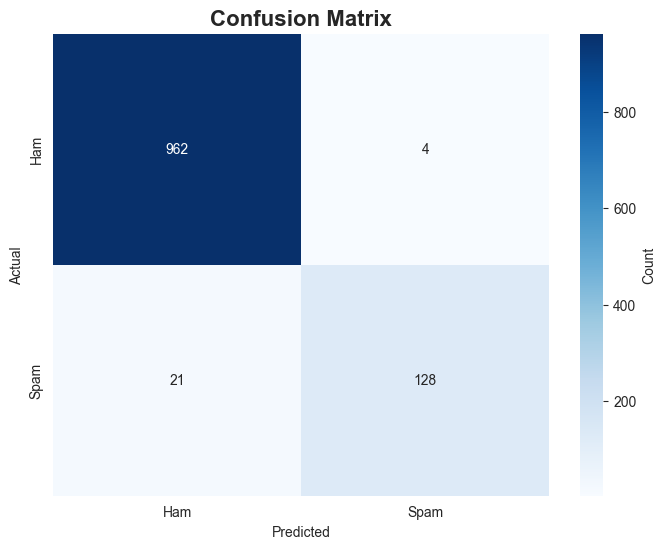


📈 Confusion Matrix Breakdown:
True Negatives (Correct Ham): 962
False Positives (Ham as Spam): 4
False Negatives (Spam as Ham): 21
True Positives (Correct Spam): 128


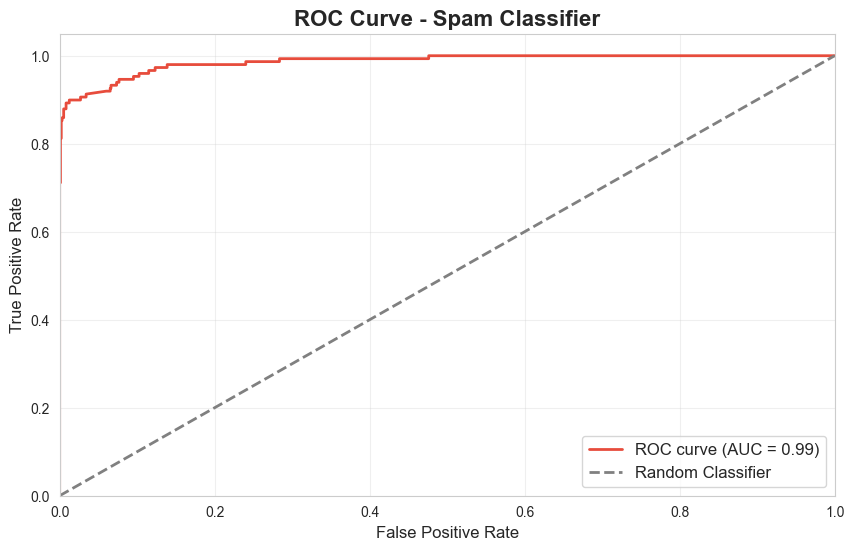

🎯 ROC AUC Score: 0.9863


In [10]:
# ## 9️⃣ Model Evaluation - Detailed Metrics

print("="*60)
print("📊 CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_test_pred, 
                           target_names=['Ham', 'Spam']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n📈 Confusion Matrix Breakdown:")
print(f"True Negatives (Correct Ham): {cm[0][0]}")
print(f"False Positives (Ham as Spam): {cm[0][1]}")
print(f"False Negatives (Spam as Ham): {cm[1][0]}")
print(f"True Positives (Correct Spam): {cm[1][1]}")

# ROC Curve
y_test_proba = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#e74c3c', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', 
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Spam Classifier', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"🎯 ROC AUC Score: {roc_auc:.4f}")

In [11]:
# Save model and vectorizer
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("✅ Model saved as 'model.pkl'")
print("✅ Vectorizer saved as 'vectorizer.pkl'")

✅ Model saved as 'model.pkl'
✅ Vectorizer saved as 'vectorizer.pkl'


In [14]:
# ## 1️⃣1️⃣ Test with Custom Messages

def predict_message(message):
    """Predict if a message is spam or ham"""
    # Preprocess
    clean_msg = preprocess_text(message)
    
    # Transform
    msg_tfidf = vectorizer.transform([clean_msg])
    
    # Predict
    prediction = model.predict(msg_tfidf)[0]
    probability = model.predict_proba(msg_tfidf)[0]
    
    label = "🚫 SPAM" if prediction == 1 else "✅ HAM"
    confidence = probability[prediction] * 100
    
    return label, confidence

# Test messages
test_messages = [
    "Hey, are we still meeting for lunch tomorrow?",
    "WINNER!! You have won a $1000 prize! Call now!",
    "Can you send me the project report by evening?",
    "FREE entry in 2 a wkly comp for a chance to win an iPad!",
    "Meeting scheduled for 3 PM in conference room B",
    "Congratulations! You've been selected for a cash prize",
    "Please review the attached document when you get time",
    "URGENT! Your account will be closed. Click here now!",
]

print("="*60)
print("🧪 TESTING WITH CUSTOM MESSAGES")
print("="*60)

for msg in test_messages:
    label, conf = predict_message(msg)
    print(f"\n📧 Message: {msg}")
    print(f"   {label} (Confidence: {conf:.2f}%)")

🧪 TESTING WITH CUSTOM MESSAGES

📧 Message: Hey, are we still meeting for lunch tomorrow?
   ✅ HAM (Confidence: 99.96%)

📧 Message: WINNER!! You have won a $1000 prize! Call now!
   🚫 SPAM (Confidence: 99.98%)

📧 Message: Can you send me the project report by evening?
   ✅ HAM (Confidence: 99.75%)

📧 Message: FREE entry in 2 a wkly comp for a chance to win an iPad!
   🚫 SPAM (Confidence: 99.98%)

📧 Message: Meeting scheduled for 3 PM in conference room B
   ✅ HAM (Confidence: 99.78%)

📧 Message: Congratulations! You've been selected for a cash prize
   🚫 SPAM (Confidence: 99.61%)

📧 Message: Please review the attached document when you get time
   ✅ HAM (Confidence: 81.09%)

📧 Message: URGENT! Your account will be closed. Click here now!
   🚫 SPAM (Confidence: 87.31%)


In [17]:
# ## 1️⃣2️⃣ Interactive Prediction - CHECK OUR OWN MESSAGES! 🎯

# Change the message below to test different texts
your_message = "Congratulations! You have won a free iPhone. Claim now!"

# Get prediction
label, confidence = predict_message(your_message)

# Display result
print("="*60)
print("🎯 YOUR MESSAGE PREDICTION")
print("="*60)
print(f"\n📧 Your Message:")
print(f"   {your_message}")
print(f"\n🔮 Prediction: {label}")
print(f"📊 Confidence: {confidence:.2f}%")
print("="*60)

your_test_messages = [
    "Hey, how are you doing?",
    "WIN FREE CASH NOW! Click here!!!",
    "Can we reschedule our meeting?",
]

print("\n" + "="*60)
print("TESTING CUSTOM MESSAGES")
print("="*60)

for i, msg in enumerate(your_test_messages, 1):
    label, conf = predict_message(msg)
    print(f"\n{i}. Message: {msg}")
    print(f"   Prediction: {label} ({conf:.2f}%)")

🎯 YOUR MESSAGE PREDICTION

📧 Your Message:
   Congratulations! You have won a free iPhone. Claim now!

🔮 Prediction: 🚫 SPAM
📊 Confidence: 99.88%

TESTING CUSTOM MESSAGES

1. Message: Hey, how are you doing?
   Prediction: ✅ HAM (99.90%)

2. Message: WIN FREE CASH NOW! Click here!!!
   Prediction: 🚫 SPAM (97.77%)

3. Message: Can we reschedule our meeting?
   Prediction: ✅ HAM (99.64%)


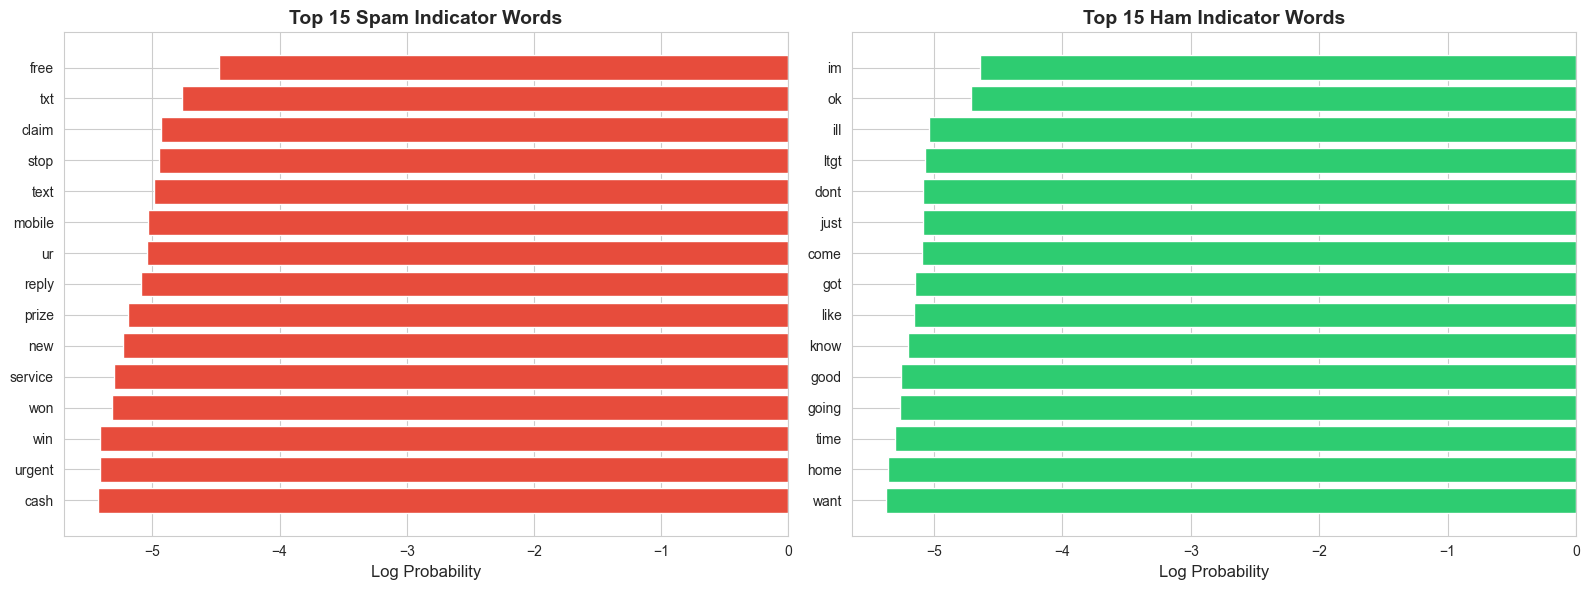

In [16]:
# ## 1️⃣3️⃣ Feature Importance - Top Spam & Ham Words

# Get feature names and their coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.feature_log_prob_

# Top spam words
spam_coef = coefficients[1]
top_spam_indices = spam_coef.argsort()[-20:][::-1]
top_spam_words = [(feature_names[i], spam_coef[i]) for i in top_spam_indices]

# Top ham words
ham_coef = coefficients[0]
top_ham_indices = ham_coef.argsort()[-20:][::-1]
top_ham_words = [(feature_names[i], ham_coef[i]) for i in top_ham_indices]

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Spam words
spam_words = [w[0] for w in top_spam_words[:15]]
spam_scores = [w[1] for w in top_spam_words[:15]]
axes[0].barh(spam_words, spam_scores, color='#e74c3c')
axes[0].set_xlabel('Log Probability', fontsize=12)
axes[0].set_title('Top 15 Spam Indicator Words', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Ham words
ham_words = [w[0] for w in top_ham_words[:15]]
ham_scores = [w[1] for w in top_ham_words[:15]]
axes[1].barh(ham_words, ham_scores, color='#2ecc71')
axes[1].set_xlabel('Log Probability', fontsize=12)
axes[1].set_title('Top 15 Ham Indicator Words', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()